<a href="https://colab.research.google.com/github/olyvias/python/blob/main/Tugas13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy dan Matplotlib (Path Loss Simulation)
## OLYVIA FERNANDA SOEDRADJAT / 1101208479 / TTX-44-01

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [3]:
f=1800
loc1='urban'
loc2='open'
loc3='suburban'
tower=80
user=1.5
dmin=200
dmax=700
N=200
d= np.random.randint(dmin,dmax,N)

In [4]:
LpUrban = cos(f,loc1,tower,user,d)
LpOpen = cos(f,loc2,tower,user,d)
LpSubUrban = cos(f,loc3,tower,user,d)

In [5]:
d_sort=d[np.argsort(d)]
Urban_sort = LpUrban[np.argsort(d)]
Open_sort = LpOpen[np.argsort(d)]
SubUrban_sort = LpSubUrban[np.argsort(d)]

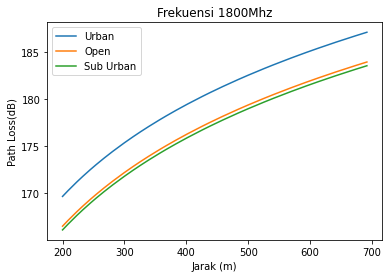

In [6]:
plt.figure()
plt.plot(d_sort,Urban_sort,label='Urban')
plt.plot(d_sort,Open_sort,label='Open')
plt.plot(d_sort,SubUrban_sort,label='Sub Urban')
plt.legend()
plt.title('Frekuensi 1800Mhz')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss(dB)')
plt.show()

In [8]:
f1=700
f2=900
f3=1800
loc='urban'
tower=80
user=1.5
dmin=200
dmax=700
N=200
d= np.random.randint(dmin,dmax,N)

In [9]:
Urbanf1 = cos(f1,loc,tower,user,d)
Urbanf2 = cos(f2,loc,tower,user,d)
Urbanf3 = cos(f3,loc,tower,user,d)

In [10]:
d_sort=d[np.argsort(d)]
Urbanf1_sort = Urbanf1[np.argsort(d)]
Urbanf2_sort = Urbanf2[np.argsort(d)]
Urbanf3_sort = Urbanf3[np.argsort(d)]

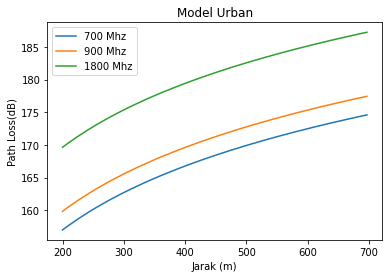

In [11]:
plt.figure()
plt.plot(d_sort,Urbanf1_sort,label='700 Mhz')
plt.plot(d_sort,Urbanf2_sort,label='900 Mhz')
plt.plot(d_sort,Urbanf3_sort,label='1800 Mhz')
plt.legend()
plt.title('Model Urban')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss(dB)')
plt.show()